In [326]:
import xarray as xr
import pandas as pd
import numpy as np
import seaborn as sns
import meitner
import warnings

import matplotlib.pyplot as plt

from vamas import Vamas

In [327]:
file = 'sh_all.vms'

In [328]:
data0 = meitner.Xps.from_vamas(path=file, region_id=6)
data1 = meitner.Xps.from_vamas(path=file, region_id=14)
xps_list = [data0,data1]

Found 43 blocks.

Detected multiple VAMAS blocks with the same name.

Excitation energy:
1486.69 eV
Found 43 blocks.

Detected multiple VAMAS blocks with the same name.

Excitation energy:
1486.69 eV


In [335]:
fit = meitner.Fit(xps_list, n_peaks=6, first_peak_index=0, fit=False)

In [336]:
fit.xps_concat

<xarray.Dataset>
Dimensions:         (be: 402)
Coordinates:
  * be              (be) float64 459.0 458.9 458.8 458.7 ... 439.2 439.1 439.0
Data variables:
    cps             (be) float64 2.356e+04 2.357e+04 ... 1.069e+04 1.073e+04
    ke              (be) float64 1.028e+03 1.028e+03 ... 1.048e+03 1.048e+03
    bg              (be) float64 2.361e+04 2.361e+04 ... 1.071e+04 1.071e+04
    cps_no_bg       (be) float64 -51.41 -41.57 -56.8 139.8 ... -72.0 -21.08 21.0
    bg_norm         (be) float64 0.06994 0.06994 0.06994 ... 0.04415 0.04414
    cps_norm        (be) float64 0.0698 0.06982 0.06978 ... 0.04407 0.04422
    cps_no_bg_norm  (be) float64 0.006116 0.006142 ... 0.005367 0.005519
    index           (be) <U2 'd0' 'd0' 'd0' 'd0' 'd0' ... 'd1' 'd1' 'd1' 'd1'

In [299]:
file1 = 'au3-0001.pxt.vms'
xps1 = meitner.Xps.from_vamas(path=file1, region_id=1)

Found 2 blocks.

Excitation energy:
655.0 eV


In [305]:
expr_constraints = {'d0_p0_amplitude': {'value': 0.5, 'min': 0, 'max': 1},
                    'd0_p1_amplitude': {'value': 0.5, 'min': 0, 'max': 1},
                    'd0_p0_center': {'value': 84, 'min': 80, 'max': 92},
                    'd0_p1_center': {'value': 88, 'min': 80, 'max': 92},
                    'd0_p0_sigma': {'value': 0.1, 'min': 10**-8, 'max': 1.5},
                    'd0_p1_sigma': {'value': 0.1, 'min': 10**-8, 'max': 1.5},
                    'd0_p0_gamma': {'value': 0.1, 'min': 10**-8, 'max': 1.5},
                    'd0_p1_gamma': {'value': 0.1, 'min': 10**-8, 'max': 1.5}}
# expr_constraints = {'d0_p0_center': {'value': 83, 'min': 82, 'max': 84},
#                     'd0_p1_center': {'value': 86.5, 'min': 85, 'max': 88}}
fit1 = meitner.Fit(xps1, n_peaks=2, first_peak_index=0, fit=False, be_guess=[83,88],
                   expr_constraints=expr_constraints)

In [306]:
# fit1.constrain_parameter_to_reference(peak_ids=1, param_id='sigma')
fit1.constrain_all_gaussian_width()

In [307]:
fit1.fit()

In [308]:
fit1.result

In [351]:
df = fit.xps_concat
df = df.to_dataframe()

In [352]:
df

,cps,ke,bg,cps_no_bg,bg_norm,cps_norm,cps_no_bg_norm,index
be,,,,,,,,
459.0,23557.0,1027.69,23608.406501,-51.406501,0.069937,0.069798,0.006116,d0
458.9,23567.0,1027.79,23608.573503,-41.573503,0.069937,0.069825,0.006142,d0
458.8,23552.0,1027.89,23608.801676,-56.801676,0.069938,0.069784,0.006101,d0
458.7,23748.0,1027.99,23608.240258,139.759742,0.069936,0.070313,0.006631,d0
458.6,23617.0,1028.09,23608.204928,8.795072,0.069936,0.069960,0.006278,d0
...,...,...,...,...,...,...,...,...
439.4,10703.0,1047.29,10713.040375,-10.040375,0.044145,0.044109,0.005407,d1
439.3,10795.0,1047.39,10712.714741,82.285259,0.044144,0.044441,0.005740,d1
439.2,10641.0,1047.49,10712.999671,-71.999671,0.044145,0.043885,0.005183,d1


KeyError: "['be'] not in index"

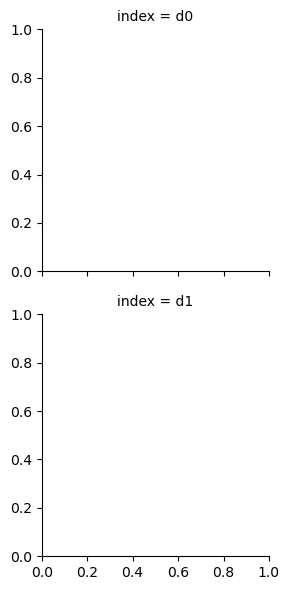

In [353]:
g = sns.FacetGrid(df, row='index', hue='index')
g.map(plt.plot, 'be', 'cps_no_bg')
# g.map(plt.axhline, y=0, lw=2, clip_on=False)
# # Set the subplots to overlap
# g.fig.subplots_adjust(hspace=-.00)
# g.set_titles("")
# g.set(yticks=[])
# g.despine(bottom=True, left=True)

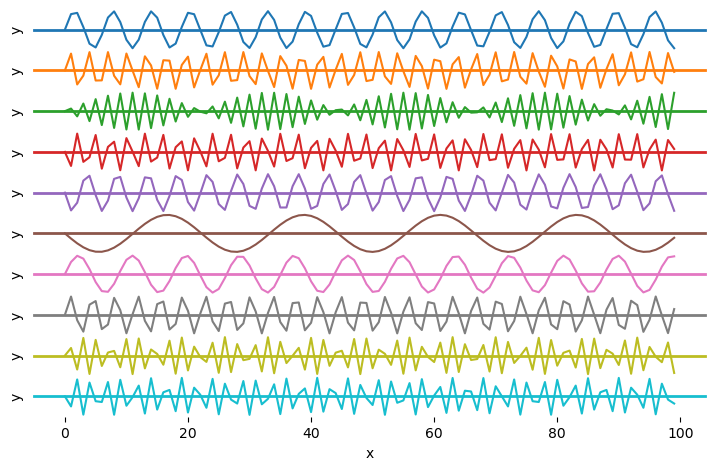

In [287]:
segments = 10
points_per_segment = 100

#your data preparation will vary
x = np.tile(np.arange(points_per_segment), segments)
z = np.floor(np.arange(points_per_segment * segments)/points_per_segment)
y = np.sin(x * (1 + z))
        
    
df = pd.DataFrame({'x': x, 'y': y, 'z': z})

pal = sns.color_palette()
g = sns.FacetGrid(df, row="z", hue="z", aspect=15, height=.5, palette=pal)
g.map(plt.plot, 'x', 'y')
g.map(plt.axhline, y=0, lw=2, clip_on=False)
# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-.00)
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

plt.show()

In [291]:
df['z']

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
995    9.0
996    9.0
997    9.0
998    9.0
999    9.0
Name: z, Length: 1000, dtype: float64

<AxesSubplot:xlabel='x'>

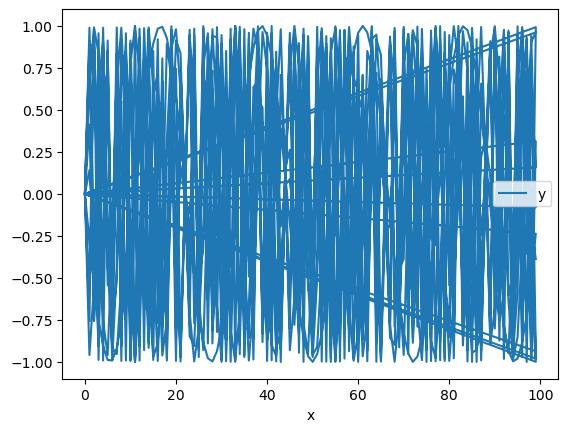

In [289]:
df.plot(x='x',y='y')